## Inversion Sampling


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

We wish to compare several sampling methods. We will implement each of them individually as functions. 
For reproducibility, let's fix the seed of the (pseudo-)random number generator.

In [2]:
np.random.seed(42)

We start with the simples Monte Carlo sampling method: inversion.
The idea is to swap the variables $x \leftrightarrow y$ and draw random values from the cumulative distribution function:
$$F(x)=y \Rightarrow F^{-1}(y)=x.$$
Let's implement this as a function.

In [3]:
def inversionSampling(x, y, n):
    """
    Applies the inverse sampling method to a given function.
    Here y = f(x) is the probability distribution function to be sampled. 
    The number of sampling points is n.
    Note that even if f is an analytical function, we should bin the data in bins of dx.
    """
    # If the points in y are a PDF, we compute the CDF and then normalise it.
    y1 = np.cumsum(y)
    y1 /= y1[-1]

    # Normally the interpolation would be y0 = (x0, x, y), but here we invert it!
    ysample = np.random.uniform(0, 1, n)
    xsample = np.interp(ysample, y1, x)
    
    # Sorting the arrays for plotting
    idx = np.argsort(xsample)
    xsample = xsample[idx]
    ysample = ysample[idx]

    return xsample

Now let's try out this sampling method using a simple gaussian function. We know exactly what to expect:
$$ f(x) = \dfrac{1}{\sqrt{2\pi}} \exp\left( -\dfrac{x^2}{2} \right).$$
Below we define this (expected) function, and the we take $n$ samples from this distribution.

In [4]:
n = 5000
x = np.linspace(-3, 3, 10000)
y = np.exp(-x ** 2 / 2) / np.sqrt(2 * np.pi)
xs = inversionSampling(x, y, n)

Now we will plot the sampled points (xs, ys) and the analytic function.

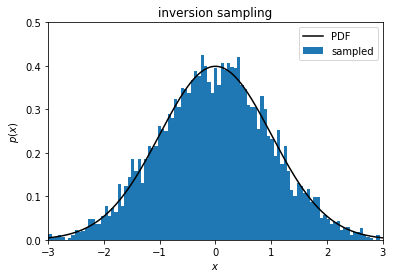

In [5]:
# Plotting the histogram with the data.
plt.plot(x, y, color = 'black', linestyle = 'solid', label = 'PDF') # original PDF
# plt.plot(x, y1, color = 'lightgrey', linestyle = 'dashed', label = 'CDF') 
plt.hist(xs, bins = 100, density = True, label = 'sampled')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.title('inversion sampling')
plt.axis([-3, 3, 0, .5])
plt.legend()